In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [18]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()


In [19]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.



In [20]:
x_train = x_train[..., tf.newaxis] #adds a additional axis (60000,28,28) --> (60000,28,28,1)
x_test = x_test[..., tf.newaxis]
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [21]:
tf.random.normal(shape=x_train.shape)

<tf.Tensor: shape=(60000, 28, 28, 1), dtype=float32, numpy=
array([[[[ 1.0563739e-01],
         [ 3.5310805e-01],
         [-1.7289357e+00],
         ...,
         [-1.7168024e+00],
         [-3.7721187e-01],
         [-4.4378743e-01]],

        [[ 3.0599344e-01],
         [-3.9575648e-01],
         [ 3.8658893e+00],
         ...,
         [ 1.0916575e+00],
         [-6.5862978e-01],
         [ 1.9468791e+00]],

        [[ 8.0380127e-02],
         [ 6.7864227e-01],
         [ 6.0861188e-01],
         ...,
         [-4.0563303e-01],
         [ 1.8786554e+00],
         [-9.9352586e-01]],

        ...,

        [[-5.6715816e-01],
         [-8.6098272e-01],
         [-2.1020237e-01],
         ...,
         [ 1.8454944e+00],
         [-2.6301748e-01],
         [ 1.7336107e+00]],

        [[ 1.3529147e+00],
         [-2.1930362e-01],
         [-3.2314590e-01],
         ...,
         [ 3.5265541e-01],
         [ 9.2359614e-01],
         [-4.5263475e-01]],

        [[-3.6237353e-01],
         

In [22]:
noise_factor = 0.3
x_train_noisy = x_train  +  noise_factor * tf.random.normal(shape=x_train.shape)
# noise factor multiplication result in increased spread in noise distribution
# result in 0.2^2 increase of variance, mean doesn't chnage (mean = 0)
x_test_noisy = x_test  +  noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

In [23]:
x_test_noisy.shape

TensorShape([10000, 28, 28, 1])

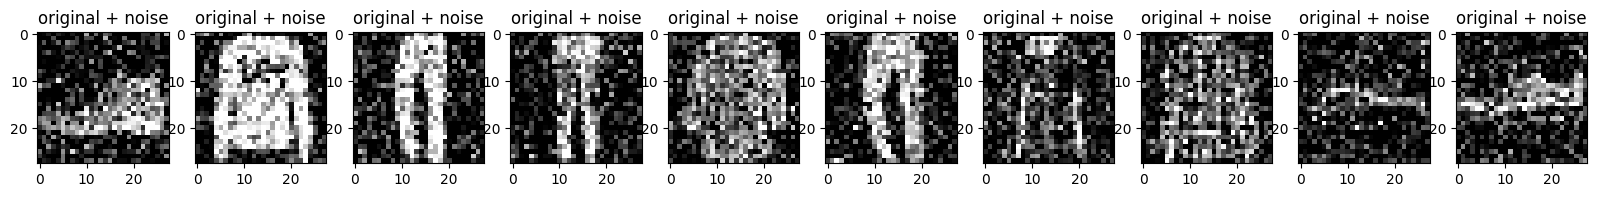

In [24]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [25]:
class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Input(shape=(28, 28, 1)),
          layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
          layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

        self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [26]:
autoencoder = Denoise()

In [27]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [28]:
history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=30,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - loss: 0.0376 - val_loss: 0.0136
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - loss: 0.0131 - val_loss: 0.0125
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 39ms/step - loss: 0.0120 - val_loss: 0.0116
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - loss: 0.0114 - val_loss: 0.0113
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - loss: 0.0111 - val_loss: 0.0111
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - loss: 0.0109 - val_loss: 0.0109
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - loss: 0.0108 - val_loss: 0.0107
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - loss: 0.0107 - val_loss: 0.0106
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 40ms/step - loss: 0.0105 - val_loss: 0.0105
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - loss: 0.0105 - val_loss: 0.0105
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - loss: 0.0104 - val_loss: 0.0105
Epoch 12

In [29]:
# Calculate MSE loss on test dataset
test_loss = autoencoder.evaluate(x_test_noisy, x_test)
print(f"Test Loss (MSE): {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0100
Test Loss (MSE): 0.01006172876805067


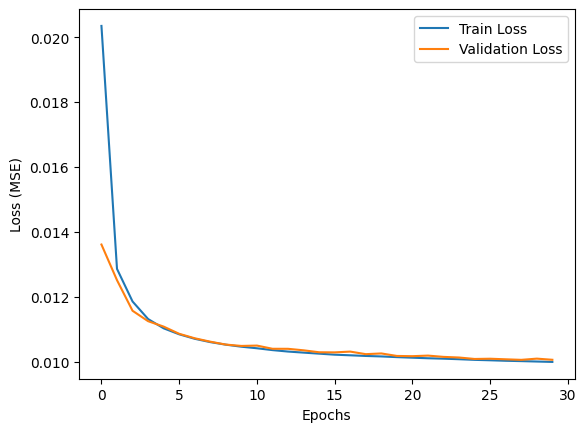

In [30]:
# Plotting the loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

In [31]:
autoencoder.encoder.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 8)             │           1,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,320 (5.16 KB)

 Trainable params: 1,320 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
autoencoder.decoder.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_transpose_2 (Conv2DTranspose) │ (32, 14, 14, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (32, 28, 28, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 28, 28, 1)             │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,897 (7.41 KB)

 Trainable params: 1,897 (7.41 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

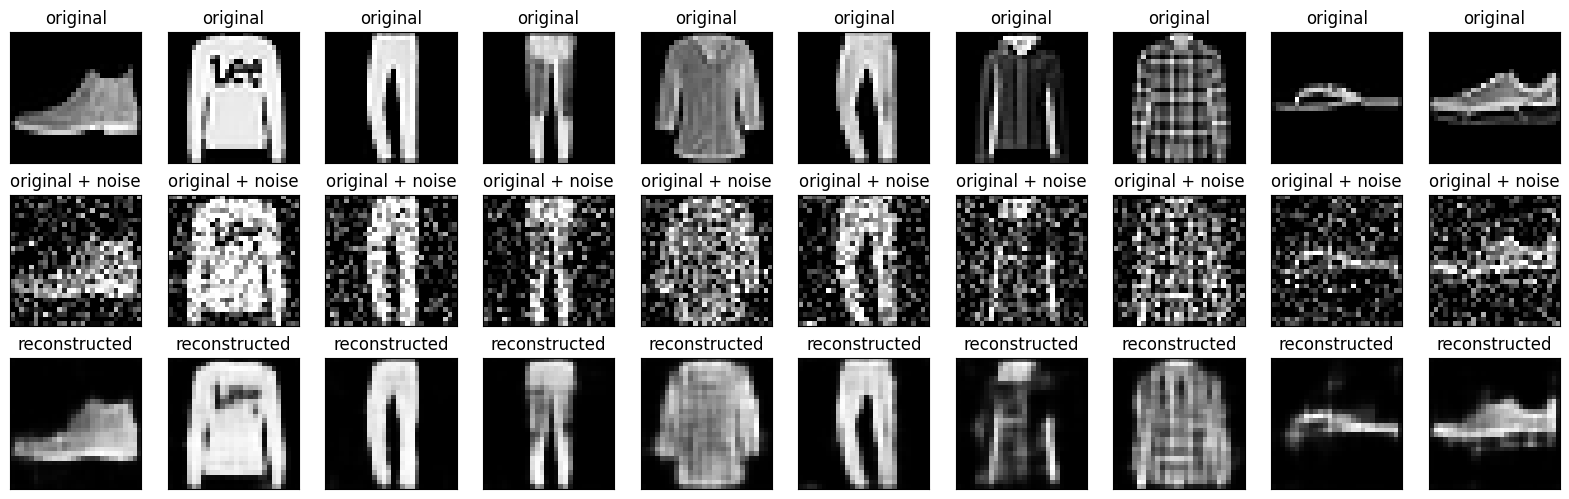

In [34]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display original + noise
    ax = plt.subplot(3, n, i + n + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(3, n, i + 2*n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()